# CS 189 HW 1
Name: **Evan Putra Limanto**  
Student ID: **25557086**  
Email: **evanlimanto@berkeley.edu**  
Dependencies: scipy, numpy, scikit-learn, scikit-image  
Instructions: simply run every cell below to get the desired results.

In [27]:
from time import time
import matplotlib.pyplot as plt
import numpy as np
import sys
from scipy import io
from sklearn import svm
from sklearn.metrics import confusion_matrix
from skimage.feature import hog

%matplotlib inline

DIGITS_CROSSVAL_K = 10
EMAIL_CROSSVAL_K = 6
digits_training_file = "data/digit-dataset/train.mat"
email_training_file = "data/spam-dataset/spam_data.mat"
kaggle_digits_dataset_file = "data/digit-dataset/test.mat"

In [2]:
def timer(func):
    def func_wrapper():
        start_time = time()
        print("Start processing...")
        sys.stdout.flush()
        retval = func()
        print("Done!")
        print("Time taken: {} seconds".format(time() - start_time))
        sys.stdout.flush()
        return retval
    return func_wrapper

In [3]:
def l2_norm(arr):
    return np.sum([x * x for x in arr]) ** 0.5

In [4]:
def shuffle_in_unison(a, b):
  assert a.shape[0] == b.shape[0]
  p = np.random.permutation(a.shape[0])
  return a[p], b[p]

In [5]:
def plot_confusion_matrix(index, cm, labels, num_training_examples, cmap=plt.cm.Blues):
  labels = list(labels)
  plt.figure(2, figsize=(20,20))
  plt.subplot(3, 3, index)
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title("CM on {} training examples".format(num_training_examples))
  plt.colorbar()
  tick_marks = np.arange(len(labels))
  plt.xticks(tick_marks, labels, rotation=45)
  plt.yticks(tick_marks, labels)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

In [6]:
def cross_validate(training_data, training_labels, c_value, cross_validation_indices, CROSSVAL_K):
  print("Runing cross validation for C value of: {}".format(c_value))
  cross_validation_data = np.array(np.split(training_data[cross_validation_indices], CROSSVAL_K))
  cross_validation_labels = np.array(np.split(training_labels[cross_validation_indices], CROSSVAL_K))
  cross_validation_accuracy = 0.0
  for i in range(CROSSVAL_K):
    mask = np.ones(CROSSVAL_K, dtype=bool)
    mask[i] = 0
    test_set = np.concatenate(cross_validation_data[mask])
    test_labels = np.concatenate(cross_validation_labels[mask])
    validation_set = cross_validation_data[i]
    validation_labels = cross_validation_labels[i]
    linear_svm = svm.LinearSVC(C=c_value)
    linear_svm.fit(test_set, test_labels)
    validation_prediction = linear_svm.predict(validation_set)
    cross_validation_accuracy += np.sum(validation_labels == validation_prediction) / float(len(validation_labels))
  cross_validation_accuracy /= CROSSVAL_K
  return cross_validation_accuracy

# Problem 1 & 2

In [88]:
@timer
def init_digits():
    global digits_images, digits_labels, digits_train_images, digits_train_labels, digits_validation_images, digits_validation_labels
    # Read and normalize image data
    digits_data = io.loadmat(digits_training_file)

    print("Transforming and flattening images...")
    
    # digits_images = np.array([np.array(image).flatten('C') for image in np.rollaxis(digits_data['train_images'], 2, 0)])
    digits_images = np.array([hog(image, orientations=12, pixels_per_cell=(4, 4), normalise=True, cells_per_block=(1, 1)) \
                              for image in np.rollaxis(digits_data['train_images'], 2, 0)])   
    digits_labels = np.ravel(digits_data['train_labels'])
    digits_images, digits_labels = shuffle_in_unison(digits_images, digits_labels)

    digits_train_images = digits_images[:50000]
    digits_train_labels = digits_labels[:50000]
    digits_validation_images = digits_images[50000:]
    digits_validation_labels = digits_labels[50000:]
init_digits()

Start processing...
Transforming and flattening images...
Done!
Time taken: 199.74821186065674 seconds


Start processing...
Training on 100 training examples...
Test error rate is 0.0
Validation error rate is 0.25249999999999995

Training on 200 training examples...
Test error rate is 0.0
Validation error rate is 0.18120000000000003

Training on 500 training examples...
Test error rate is 0.0
Validation error rate is 0.12870000000000004

Training on 1000 training examples...
Test error rate is 0.0
Validation error rate is 0.1079

Training on 2000 training examples...
Test error rate is 0.0004999999999999449
Validation error rate is 0.08409999999999995

Training on 5000 training examples...
Test error rate is 0.0020000000000000018
Validation error rate is 0.06730000000000003

Training on 10000 training examples...
Test error rate is 0.006900000000000017
Validation error rate is 0.05489999999999995



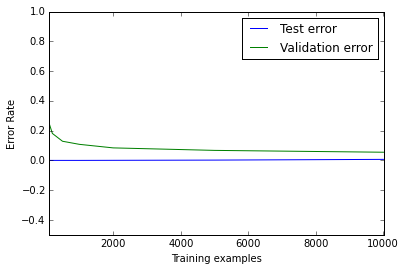

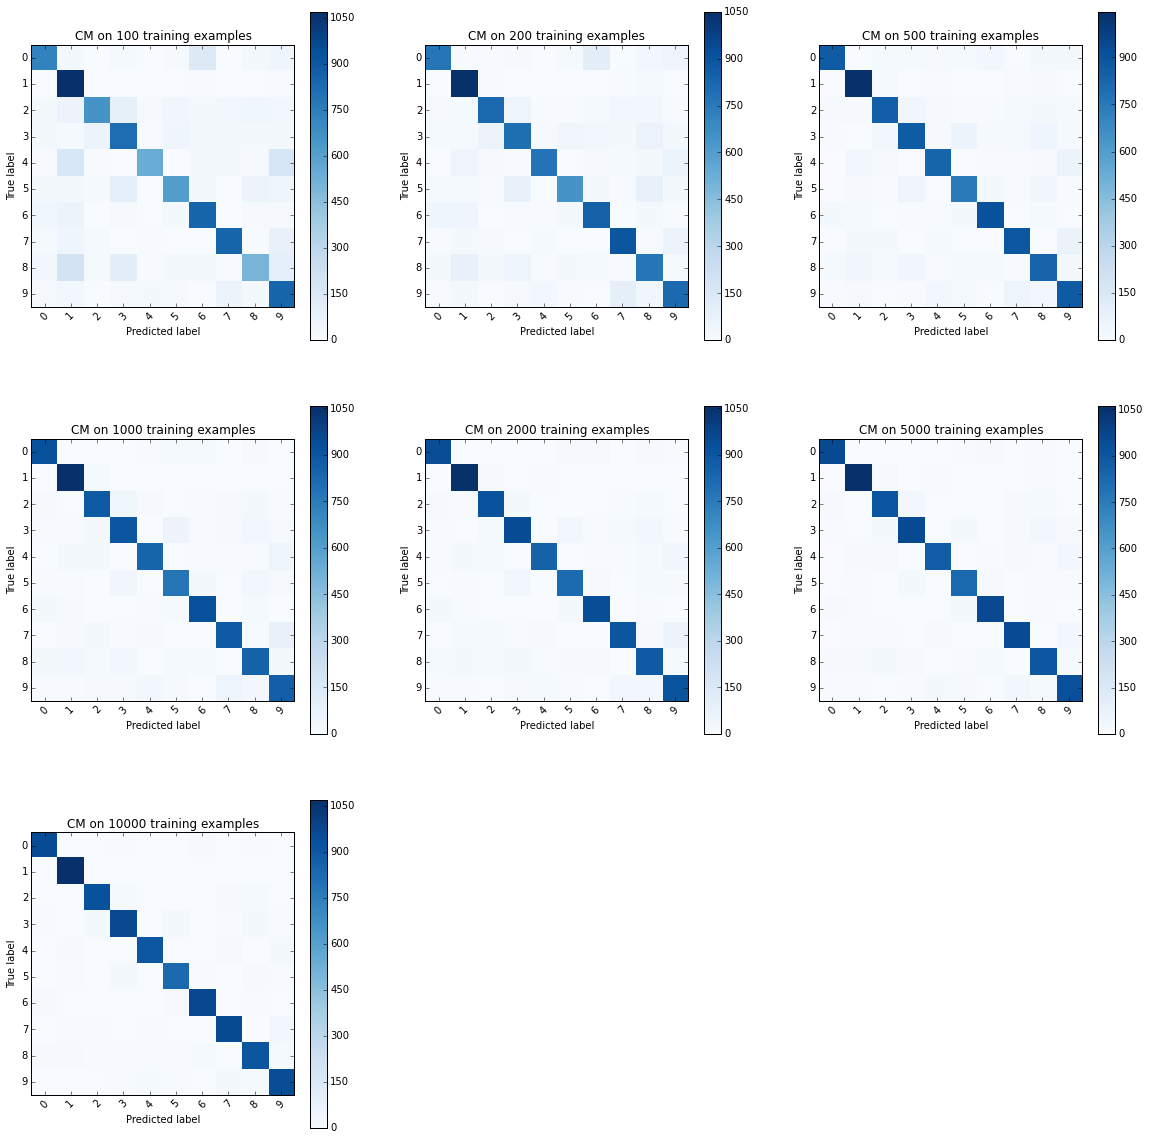

Done!
Time taken: 5.194427967071533 seconds


In [89]:
@timer
def train_and_validate_digits():
    # Training and validation
    possible_labels = set(digits_labels)
    num_examples = [100, 200, 500, 1000, 2000, 5000, 10000]
    test_error_rates, validation_error_rates = [], []

    for (i, num_training_examples) in enumerate(num_examples):
        print("Training on {} training examples...".format(
              num_training_examples))
        training_set = digits_train_images[:num_training_examples]
        training_labels = digits_train_labels[:num_training_examples]

        linear_svm = svm.LinearSVC()
        linear_svm.fit(training_set, training_labels)

        test_predicted_labels = linear_svm.predict(training_set)
        test_accuracy = np.sum(test_predicted_labels == training_labels) \
                        / float(num_training_examples)

        validation_predicted_labels = 
            linear_svm.predict(digits_validation_images)
        validation_accuracy = \
            np.sum(validation_predicted_labels == 
                   digits_validation_labels) \
            / float(10000)

        print("Test error rate is {}".format(1.0 - test_accuracy))
        print("Validation error rate is {}".format(
              1.0 - validation_accuracy))
        test_error_rates.append(1.0 - test_accuracy)
        validation_error_rates.append(1.0 - validation_accuracy)

        cm = confusion_matrix(digits_validation_labels,
                              validation_predicted_labels)
        plot_confusion_matrix(i + 1, cm, possible_labels,
                              num_training_examples)
        print("")

    plt.figure(1)
    plt.xlabel("Training examples")
    plt.ylabel("Error Rate")
    plt.axis([min(num_examples) - 5, max(num_examples) + 5, -0.5, 1.0])
    test_line = plt.plot(num_examples, test_error_rates,
                         label='Test error')
    validation_line = plt.plot(num_examples,
        validation_error_rates, label='Validation error')
    plt.legend()
    plt.show()
train_and_validate_digits()

Using the Histogram of Oriented Gradients method, a validation error rate of 5.5% is obtained on 10000 training examples.

As we can see from the confusion matrices, the algorithm performs relatively well on the validation set even with only 100 training examples. With more training examples, the accuracy increases rapidly with diminishing returns.

In [90]:
@timer
def cross_validation_digits():
    max_accuracy, best_c_value = 0.0, 0.0
    c_values = np.array([10**i for i in range(-3, 1)])
    cross_validation_indices = np.arange(0, 10000)
    np.random.shuffle(cross_validation_indices)

    for c_value in c_values:
        cross_validation_accuracy = \
            cross_validate(digits_train_images, digits_train_labels, \
                c_value, cross_validation_indices, DIGITS_CROSSVAL_K)
        print("Cross validation accuracy for C value {}: {}".format( \
              c_value, cross_validation_accuracy))
        sys.stdout.flush()
        if cross_validation_accuracy > max_accuracy:
            max_accuracy, best_c_value = cross_validation_accuracy, c_value
    return best_c_value
digits_best_c_value = cross_validation_digits()

Start processing...
Runing cross validation for C value of: 0.001
Cross validation accuracy for C value 0.001: 0.9054000000000002
Runing cross validation for C value of: 0.01
Cross validation accuracy for C value 0.01: 0.9397
Runing cross validation for C value of: 0.1
Cross validation accuracy for C value 0.1: 0.9498
Runing cross validation for C value of: 1.0
Cross validation accuracy for C value 1.0: 0.9466999999999999
Done!
Time taken: 30.05753779411316 seconds


# Problem 3
Cross-validation allows the model to generalize better to values unseen before, since we simulate training different subsets of the training data to calculate the accuracy for different values of C.
C value = **0.1**  
Validation error rate = **0.0502**  
Kaggle score = **0.96320**

In [91]:
@timer
def kaggle_dataset_digits():
    num_test_data = 50000
    linear_svm = svm.LinearSVC(C=digits_best_c_value)
    linear_svm.fit(digits_images[:num_test_data], \
                   digits_labels[:num_test_data])

    validation_predicted_labels = \
        linear_svm.predict(digits_validation_images)
    validation_accuracy = \
        np.sum(validation_predicted_labels == \
               digits_validation_labels) / float(10000)
    
    print("With C value = {}".format(digits_best_c_value))
    print("Validation accuracy = {}".format(validation_accuracy))
    sys.stdout.flush()
    
    kaggle_data = io.loadmat(kaggle_digits_dataset_file)
    kaggle_images = np.array([hog(image, orientations=12, \
        pixels_per_cell=(4, 4), normalise=True, cells_per_block=(1, 1)) \
        for image in np.rollaxis(kaggle_data['test_images'], 2, 1)])
    kaggle_labels = linear_svm.predict(kaggle_images)
    
    with open("kaggle_digits.txt", "w+") as kaggle_file:
        kaggle_file.write("Id,Category\n")
        for i in range(len(kaggle_labels)):
            kaggle_file.write(str(i+1)+","+str(kaggle_labels[i])+"\n")
        kaggle_file.close()
kaggle_dataset_digits()

Start processing...
With C value = 0.1
Validation accuracy = 0.9595
Done!
Time taken: 36.54279112815857 seconds


# Problem 4

In [22]:
@timer
def init_email():
    global email_train_features, email_train_labels, email_test_data
    # Read and normalize email data
    email_data = io.loadmat(email_training_file)
    
    email_train_features = email_data['training_data']
    email_train_labels = \
        np.ravel(np.rollaxis(email_data['training_labels'], 1, 0))
    email_test_data = email_data['test_data']
init_email()

Start processing...
Done!
Time taken: 0.04586601257324219 seconds


In [23]:
@timer
def cross_validation_email():
    max_accuracy, best_c_value = 0.0, 0.0
    c_values = np.array([10**i for i in range(-5, 10)])
    cross_validation_indices = np.arange(0, 5172)
    np.random.shuffle(cross_validation_indices)

    for c_value in c_values:
        cross_validation_accuracy = \
            cross_validate(email_train_features, email_train_labels, \
                c_value, cross_validation_indices, EMAIL_CROSSVAL_K)
        print("Cross validation accuracy for C value {}: {}".format(
                c_value, cross_validation_accuracy))
        sys.stdout.flush()
        if cross_validation_accuracy > max_accuracy:
            max_accuracy, best_c_value = cross_validation_accuracy, c_value
    return best_c_value
best_email_c_value = cross_validation_email()

Start processing...
Runing cross validation for C value of: 1e-05
Cross validation accuracy for C value 1e-05: 0.7906032482598607
Runing cross validation for C value of: 0.0001
Cross validation accuracy for C value 0.0001: 0.8530549110595514
Runing cross validation for C value of: 0.001
Cross validation accuracy for C value 0.001: 0.9172467130703791
Runing cross validation for C value of: 0.01
Cross validation accuracy for C value 0.01: 0.9452822892498066
Runing cross validation for C value of: 0.1
Cross validation accuracy for C value 0.1: 0.9499226604795051
Runing cross validation for C value of: 1.0
Cross validation accuracy for C value 1.0: 0.9501160092807425
Runing cross validation for C value of: 10.0
Cross validation accuracy for C value 10.0: 0.9499226604795051
Runing cross validation for C value of: 100.0
Cross validation accuracy for C value 100.0: 0.9211136890951277
Runing cross validation for C value of: 1000.0
Cross validation accuracy for C value 1000.0: 0.911252900232018

C value = **1.0**  
Validation error rate = **0.0499**  
Kaggle score = **0.84421**

I added a total of 400 features which are the top 200 words in both spam and ham emails, which don't exist in the other dataset.
Also, I removed these words: "other", "business", "path", "pleased", "record" and the '[' character.

In [24]:
@timer
def kaggle_dataset_emails():
    linear_svm = svm.SVC(C=best_email_c_value, kernel='linear')
    linear_svm.fit(email_train_features, email_train_labels)
    
    validation_predicted_labels = \
        linear_svm.predict(email_train_features[4741:])
    validation_accuracy = np.sum(
        validation_predicted_labels == email_train_labels[4741:]) \
        / float(431)
    
    print("With C value = {}".format(best_email_c_value))
    print("Validation accuracy = {}".format(validation_accuracy))
    sys.stdout.flush()
    
    kaggle_labels = linear_svm.predict(email_test_data)
    
    with open("kaggle_emails.txt", "w+") as kaggle_file:
        kaggle_file.write("Id,Category\n")
        for i in range(len(kaggle_labels)):
            kaggle_file.write(str(i + 1)+","+str(kaggle_labels[i])+"\n")
        kaggle_file.close()
kaggle_dataset_emails()

Start processing...
Done!
Time taken: 11.173685073852539 seconds
